### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import pickle

In [2]:
df = pd.read_csv('../02_Daten/Kaffeemaschine/sp_xdk.csv', sep=';')

In [3]:
# Richtige Zeit für alle Einträge
df['time'] = [datetime.utcfromtimestamp(x/1000) for x in df['time']]

In [4]:
df['day_number'] = df['time'].dt.day_of_week

In [5]:
df['day_name'] = df['day_number']

In [6]:
df['day_name'].replace(0, "Montag", inplace=True)
df['day_name'].replace(1, "Dienstag", inplace=True)
df['day_name'].replace(2, "Mittwoch", inplace=True)
df['day_name'].replace(3, "Donnerstag", inplace=True)
df['day_name'].replace(4, "Freitag", inplace=True)
df['day_name'].replace(5, "Samstag", inplace=True)
df['day_name'].replace(6, "Sonntag", inplace=True)

In [7]:
df.head()

time  buttonpressed      x      y      z  day_number  \
0 2022-01-28 10:11:50.881          False  0.159  4.074  0.277           4   
1 2022-01-28 10:11:51.039          False  0.128  4.097  0.262           4   
2 2022-01-28 10:11:51.241          False  0.171  4.099  0.260           4   
3 2022-01-28 10:11:51.369          False  0.158  4.106  0.262           4   
4 2022-01-28 10:11:51.511          False  0.166  4.123  0.239           4   

  day_name  
0  Freitag  
1  Freitag  
2  Freitag  
3  Freitag  
4  Freitag

In [8]:
df.tail()

time  buttonpressed      x      y      z  \
5610774 2022-02-09 15:57:11.679          False  0.236  0.066  4.267   
5610775 2022-02-09 15:57:11.867          False  0.221  0.058  4.265   
5610776 2022-02-09 15:57:12.062          False  0.182  0.023  4.277   
5610777 2022-02-09 15:57:12.205          False  0.241  0.014  4.265   
5610778 2022-02-09 15:57:12.444          False  0.224  0.049  4.280   

         day_number  day_name  
5610774           2  Mittwoch  
5610775           2  Mittwoch  
5610776           2  Mittwoch  
5610777           2  Mittwoch  
5610778           2  Mittwoch

In [9]:
# insgesamt 5.610.779 Einträge
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610779 entries, 0 to 5610778
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   time           datetime64[ns]
 1   buttonpressed  bool          
 2   x              float64       
 3   y              float64       
 4   z              float64       
 5   day_number     int64         
 6   day_name       object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 262.2+ MB


In [10]:
# keine fehlenden Werte
df.isnull().sum()

time             0
buttonpressed    0
x                0
y                0
z                0
day_number       0
day_name         0
dtype: int64

In [11]:
# einfache statistische Werte anzeigen lassen. Ausreißer bei y?
print(df.describe())

# ein Eintrag mit ungewöhnlich hohem y
print(df[df['y']>100])

# ein Eintrag mit ungewöhnlich niedrigem y
print(df[df['y']<-100])

                  x             y             z    day_number
count  5.610779e+06  5.610779e+06  5.610779e+06  5.610779e+06
mean   2.558145e-01  5.109091e-02  4.266428e+00  3.007580e+00
std    4.874310e-02  1.001756e+01  1.345958e-01  2.140872e+00
min   -4.632000e+00 -1.677717e+04 -3.996000e+00  0.000000e+00
25%    2.230000e-01  3.400000e-02  4.260000e+00  1.000000e+00
50%    2.490000e-01  4.900000e-02  4.270000e+00  3.000000e+00
75%    2.910000e-01  6.200000e-02  4.281000e+00  5.000000e+00
max    3.341000e+00  1.677721e+04  8.191000e+00  6.000000e+00
                           time  buttonpressed      x             y      z  \
4646434 2022-02-07 12:01:10.466          False  0.354  16777.208984  4.259   

         day_number day_name  
4646434           0   Montag  
                           time  buttonpressed      x             y      z  \
2670898 2022-02-03 00:05:03.619          False  0.214 -16777.171875  4.284   

         day_number    day_name  
2670898           3  Donnerstag 

In [12]:
# diese zwei Einträge entfernen
df.drop(df[df.y < -100].index, inplace=True)
df.drop(df[df.y > 100].index, inplace=True)
df.reset_index(inplace=True)

In [13]:
df.drop(['index'], axis=1, inplace=True)

In [14]:
# Button pressed ist immer False -> kann gelöscht werden
print(df.buttonpressed.value_counts())
df.drop(['buttonpressed'], axis=1, inplace=True)

False    5610777
Name: buttonpressed, dtype: int64


In [15]:
with open('preprocessed_coffee.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

Text(0, 0.5, 'Ausschlag')

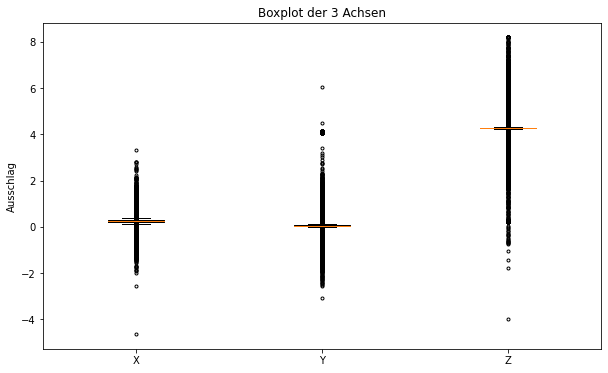

In [16]:
props = dict(marker='.')
labels = ['X','Y','Z']

box = df[['x','y','z']]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(box, flierprops=props)

ax.set_title("Boxplot der 3 Achsen")
ax.set_xticklabels(labels)
ax.set_ylabel("Ausschlag")

In [17]:
box.describe().round(3)

x            y            z
count  5610777.000  5610777.000  5610777.000
mean         0.256        0.051        4.266
std          0.049        0.134        0.135
min         -4.632       -3.072       -3.996
25%          0.223        0.034        4.260
50%          0.249        0.049        4.270
75%          0.291        0.062        4.281
max          3.341        6.047        8.191

(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 3.000000e+00, 1.000000e+00,
        3.000000e+00, 1.000000e+00, 1.000000e+00, 3.000000e+00,
        7.000000e+00, 1.500000e+01, 3.000000e+00, 1.500000e+01,
        1.500000e+01, 2.500000e+01, 5.600000e+01, 4.500000e+01,
        7.000000e+01, 7.200000e+01, 1.150000e+02, 1.800000e+02,
        1.720000e+02, 2.040000e+02, 2.550000e+02, 2.890000e+02,
        3.740000e+02, 3.920000e+02, 4.640000e+02, 1.154400e+04,
        1.770524e+06, 2.953753e+06, 8.66

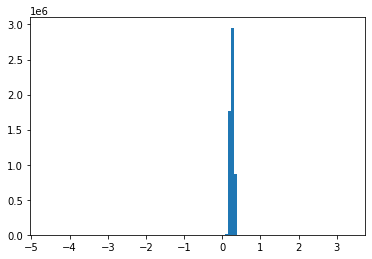

In [18]:
plt.hist(df.x, bins=100)

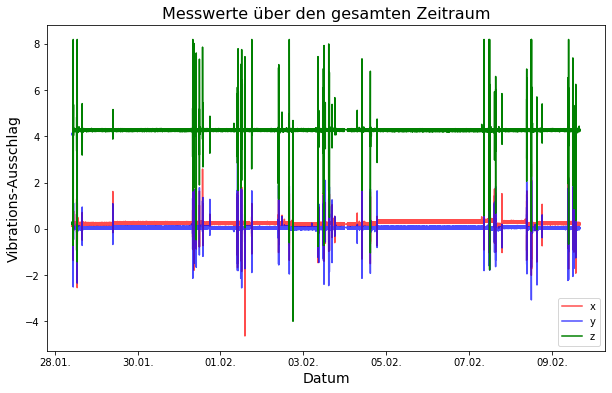

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.time, df.x, color='red', label='x', alpha=0.7)
ax.plot(df.time, df.y, color='blue', label='y', alpha=0.7)
ax.plot(df.time, df.z, color='green', label='z')

plt.legend(loc=4)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)    
ax.set_title("Messwerte über den gesamten Zeitraum", fontsize=16)  

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

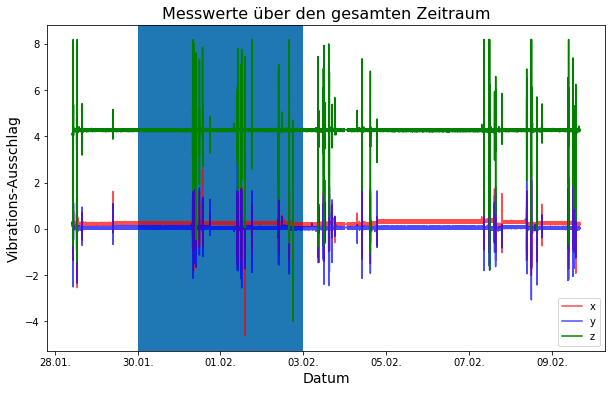

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.time, df.x, color='red', label='x', alpha=0.7)
ax.plot(df.time, df.y, color='blue', label='y', alpha=0.7)
ax.plot(df.time, df.z, color='green', label='z')

plt.legend(loc=4)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)    
ax.set_title("Messwerte über den gesamten Zeitraum", fontsize=16)  

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

ax.axvspan(datetime(2022, 1, 30), datetime(2022, 2, 3))

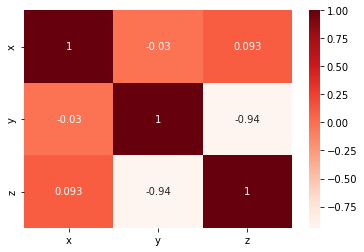

In [21]:
# starke negative Korrelation zwischen y und z. Ansonsten nur schwache Korrelation
# unnötig...
sns.heatmap(df[['x','y','z']].corr(), annot=True, cmap = 'Reds')
plt.show()

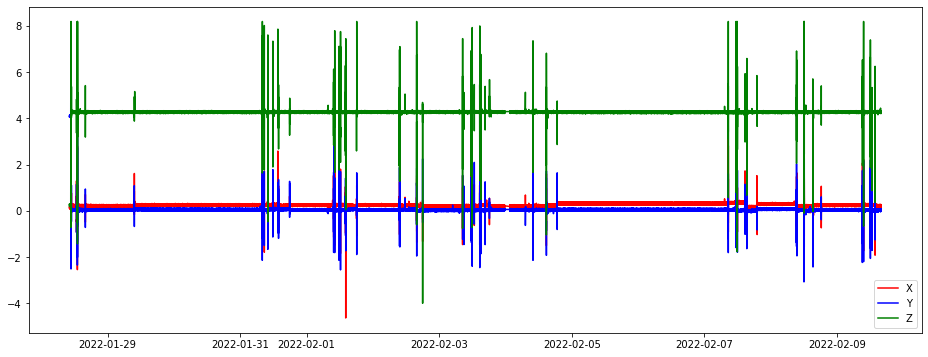

In [22]:
# Ausschläge sind immer an gleicher Stelle -> Fokusierung auf eine Variable ausreichend
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time, df.x, color='red', label='X')
ax.plot(df.time, df.y, color='blue', label='Y')
ax.plot(df.time, df.z, color='green', label='Z')

plt.legend(loc=4)

In [23]:
# raus finden, wo Bewegungen stattfinden -> Werte steigen oder sinken
df[df.x > 0.6]

time      x      y      z  day_number  day_name
5790    2022-01-28 10:39:19.962  2.110  1.207 -0.717           4   Freitag
6248    2022-01-28 10:41:04.368  0.967 -0.174  4.102           4   Freitag
6249    2022-01-28 10:41:04.593  1.445  0.583  5.641           4   Freitag
6256    2022-01-28 10:41:06.025  1.090 -0.936  4.667           4   Freitag
6265    2022-01-28 10:41:07.885  0.631 -0.100  3.349           4   Freitag
...                         ...    ...    ...    ...         ...       ...
5571308 2022-02-09 13:45:38.281  0.829 -0.097  4.553           2  Mittwoch
5571309 2022-02-09 13:45:38.446  0.702 -0.264  4.510           2  Mittwoch
5571313 2022-02-09 13:45:39.316  0.646 -0.092  4.048           2  Mittwoch
5571314 2022-02-09 13:45:39.503  0.913  0.284  4.783           2  Mittwoch
5571427 2022-02-09 13:46:02.229  0.837  0.111  4.433           2  Mittwoch

[1774 rows x 6 columns]

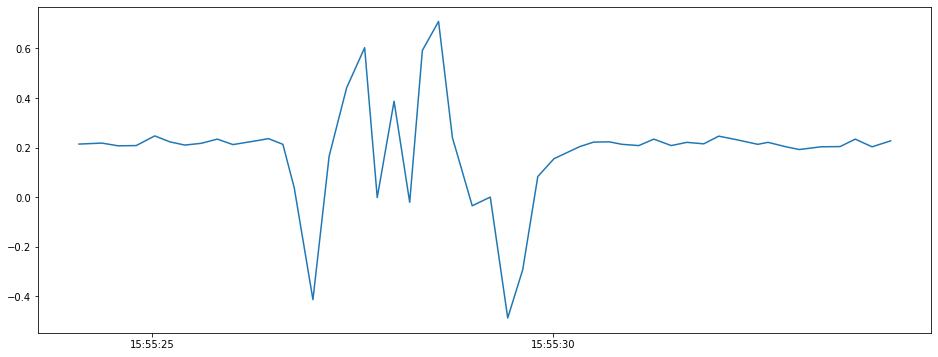

In [24]:
# starkes reinzoomen auf eine Bewegungssequenz -> sehr geringe Bewegungen
sample = df[108200:108250]

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(sample.time, sample.x)

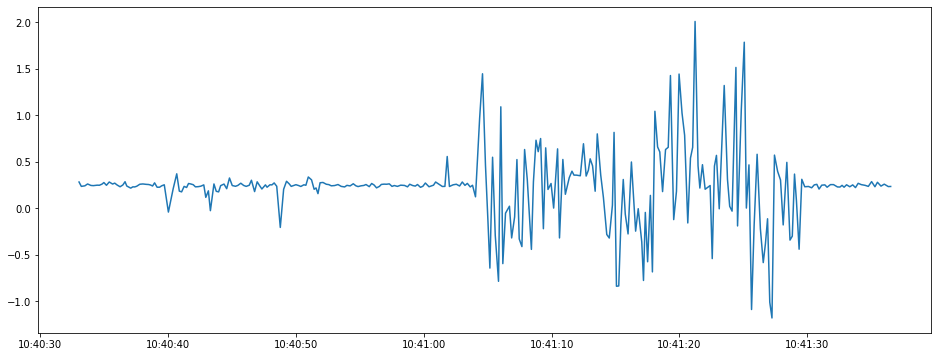

In [25]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[6100:6400], df.x[6100:6400])

C:\Users\pauls\AppData\Local\Temp/ipykernel_13224/4129546108.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


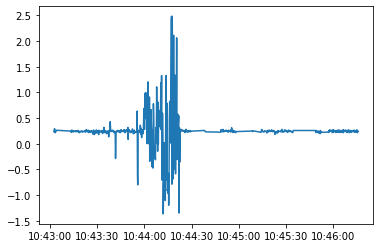

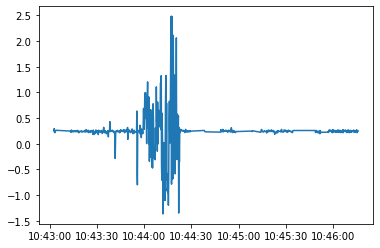

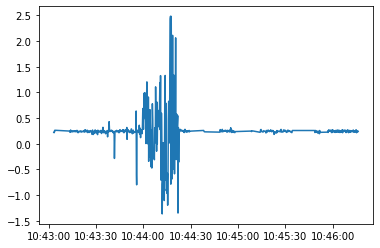

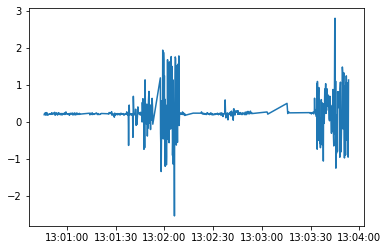

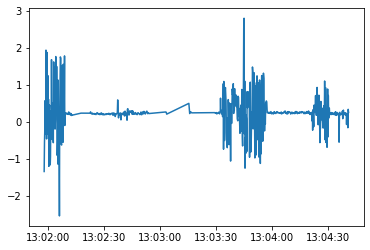

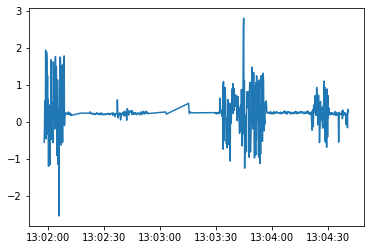

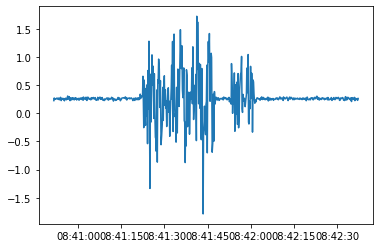

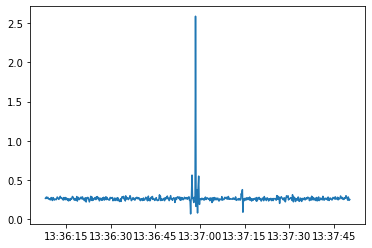

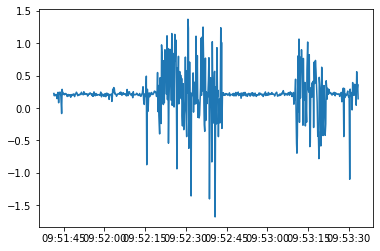

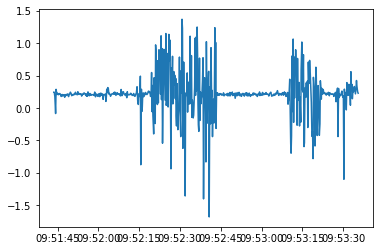

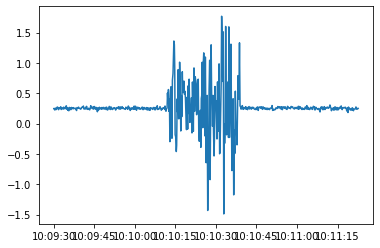

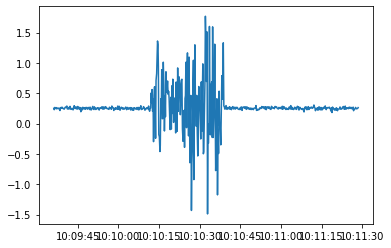

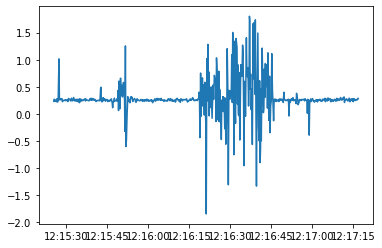

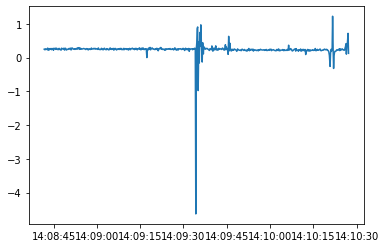

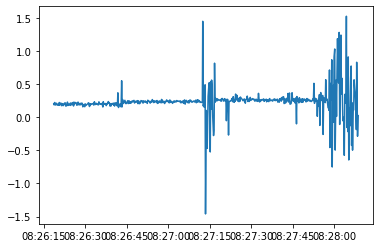

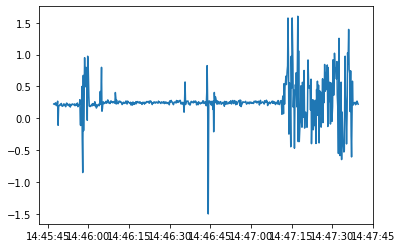

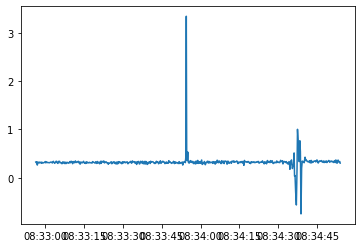

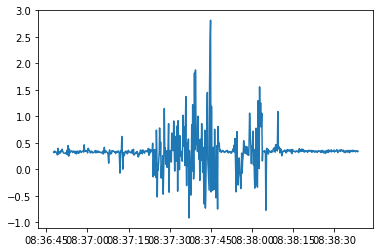

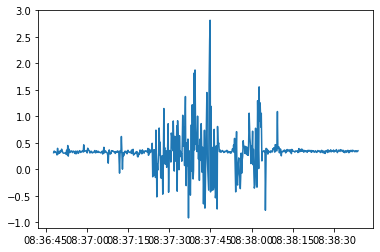

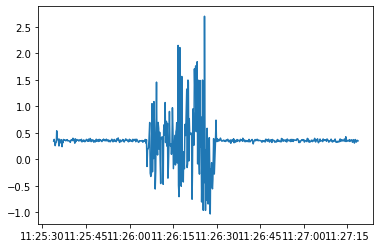

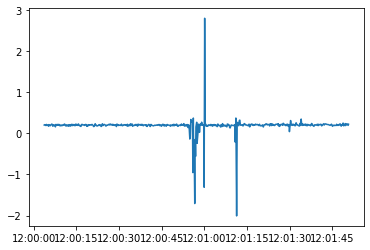

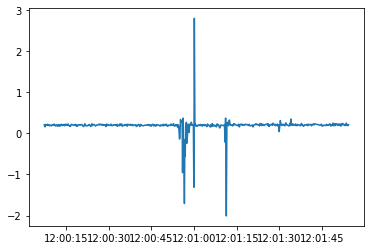

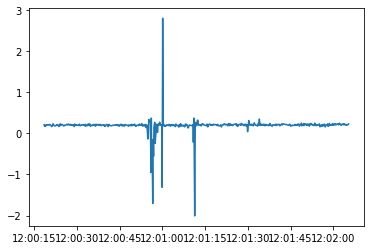

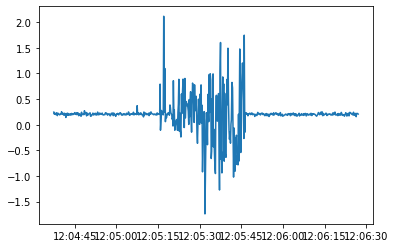

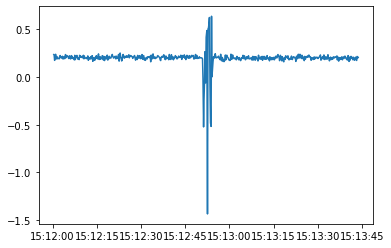

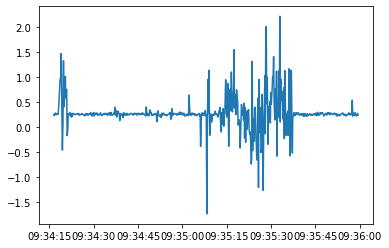

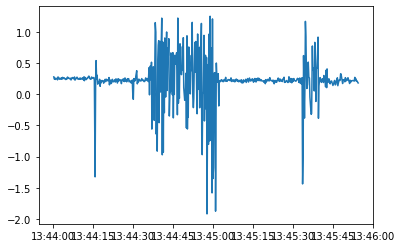

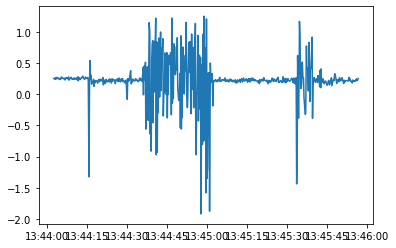

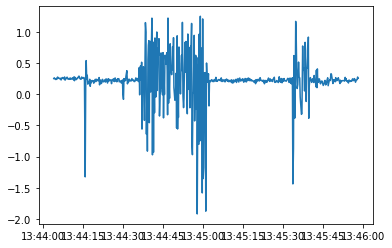

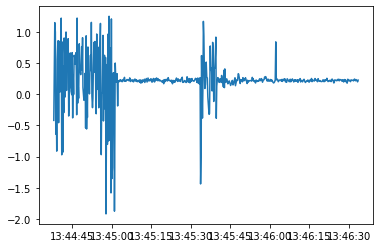

In [26]:
''' Wenn X einen bestimmten Wert über- oder unterschreitet wird für diese Stelle eine Grafik erstellt
    Problem: mehrere Grafiken von der gleichen Stelle, wenn folgende Werte auch über / unter Threshold. Für einen 
Zustand soll ja nur eine Grafik erstellt werden und nicht mehrere direkt hintereinander
    mögliche Lösung: Liste mit jeweiligen Indexen speichern und nur Grafik anzeigen, wenn in direkter Umgebung 
nicht schon eine Grafik erstellt wurde '''

for ind, (time, val) in enumerate(zip(df.time, df.x)):
    if (val > 2.3 or val < -1.4):
        #print(i,time,val)
        plt.figure()
        plt.plot(df.time[ind - 300: ind + 300], df.x[ind - 300: ind + 300])

In [27]:
df.describe()

x             y             z    day_number
count  5.610777e+06  5.610777e+06  5.610777e+06  5.610777e+06
mean   2.558145e-01  5.109092e-02  4.266428e+00  3.007581e+00
std    4.874309e-02  1.344624e-01  1.345958e-01  2.140872e+00
min   -4.632000e+00 -3.072000e+00 -3.996000e+00  0.000000e+00
25%    2.230000e-01  3.400000e-02  4.260000e+00  1.000000e+00
50%    2.490000e-01  4.900000e-02  4.270000e+00  3.000000e+00
75%    2.910000e-01  6.200000e-02  4.281000e+00  5.000000e+00
max    3.341000e+00  6.047000e+00  8.191000e+00  6.000000e+00

In [28]:
df.quantile(1 - 100 / 5610779)

x             1.496
y             4.137
z             7.015
day_number    6.000
Name: 0.9999821771629216, dtype: float64

In [29]:
df.quantile(100 / 5610779)

x            -0.956
y            -1.496
z             0.215
day_number    0.000
Name: 1.7822837078416385e-05, dtype: float64

In [30]:
# erst mal alle Indices, wo X-Wert über Threshold zu Liste hinzufügen
# Index bzw. Zahl muss aus Liste entfernt werden, wenn vorheriger Wert in einer bestimmten Spanne liegt (bspw. 200)
ind_x = []
ind_y = []
ind_z = []

for ind, (time, x, y, z) in enumerate(zip(df.time, df.x, df.y, df.z)):
    if (x > 1.4 or x < -1):
        ind_x.append(ind)
    if (y > 4.2 or y < -2.1):
        ind_y.append(ind)
    if (z > 8.2 or z < -0.2):
        ind_z.append(ind)        

In [31]:
print(len(ind_x), len(ind_y), len(ind_z))

218 22 19


In [32]:
th = 500
a = np.array(ind_x)
X = np.delete(a, np.argwhere(np.ediff1d(a) <= th) + 1)

In [33]:
len(X)

45

In [34]:
b = np.array(ind_y)
Y = np.delete(b, np.argwhere(np.ediff1d(b) <= th) + 1)

In [35]:
c = np.array(ind_z)
Z = np.delete(c, np.argwhere(np.ediff1d(c) <= th) + 1)

C:\Users\pauls\AppData\Local\Temp/ipykernel_13224/22820286.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,6))


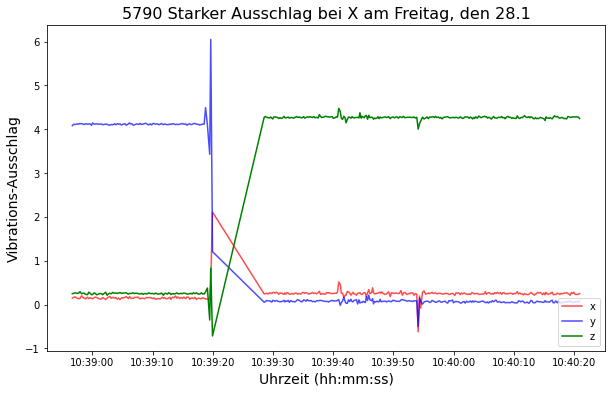

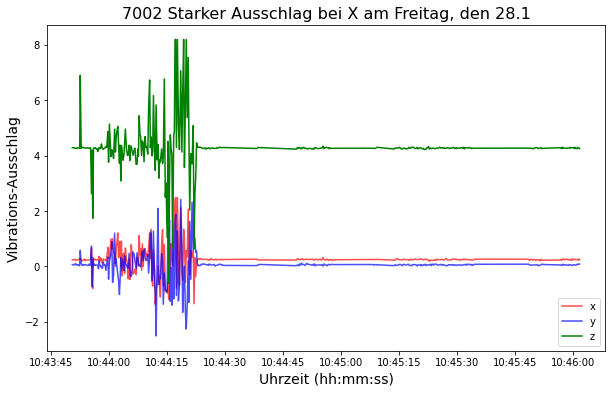

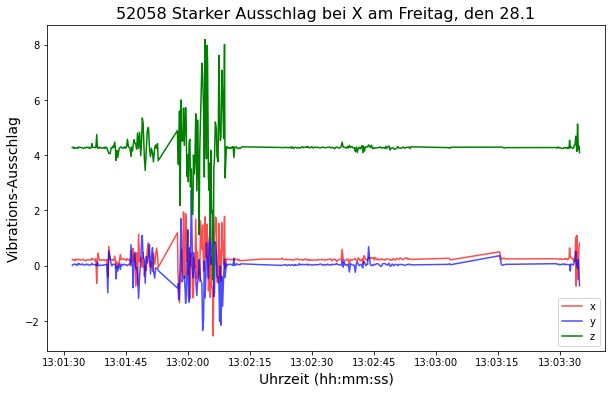

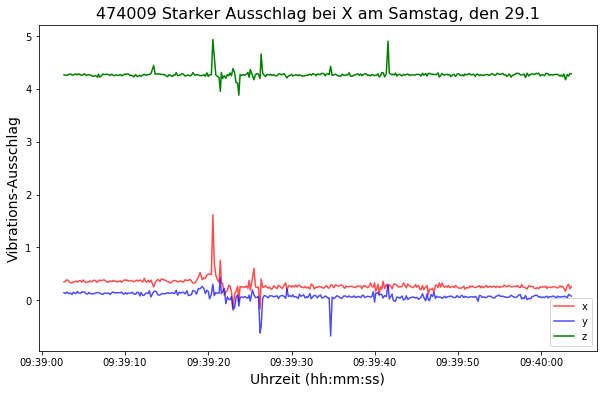

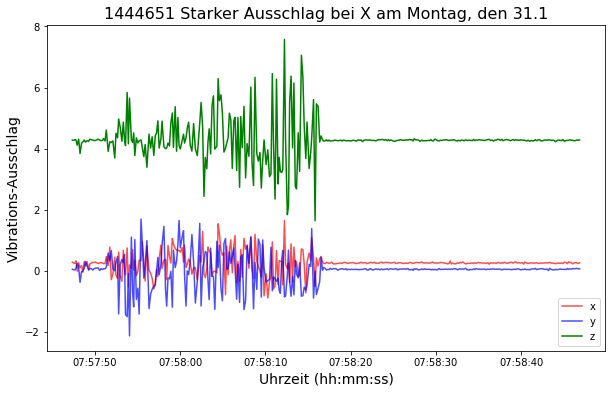

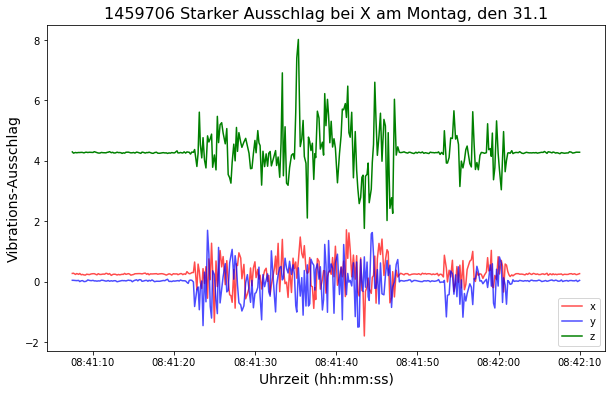

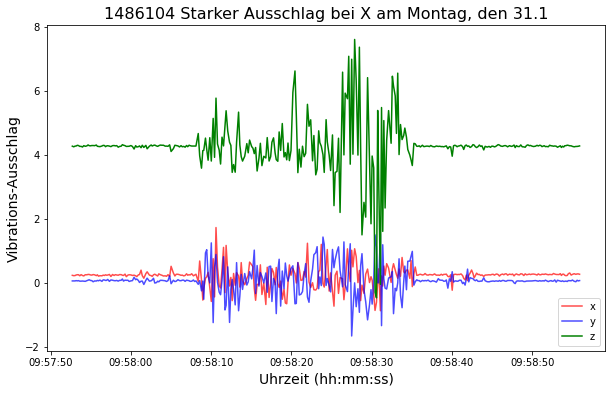

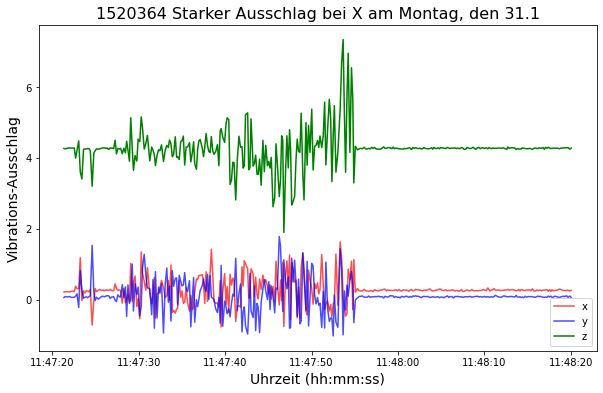

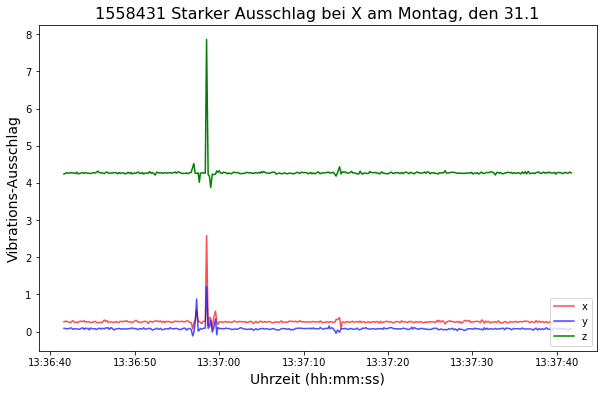

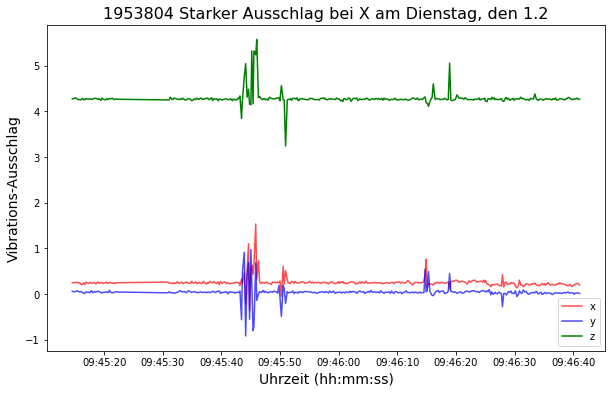

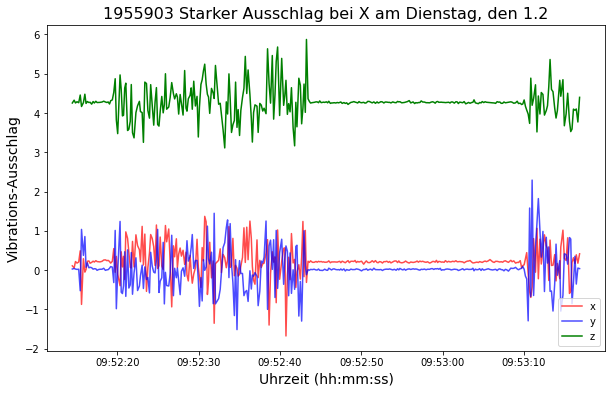

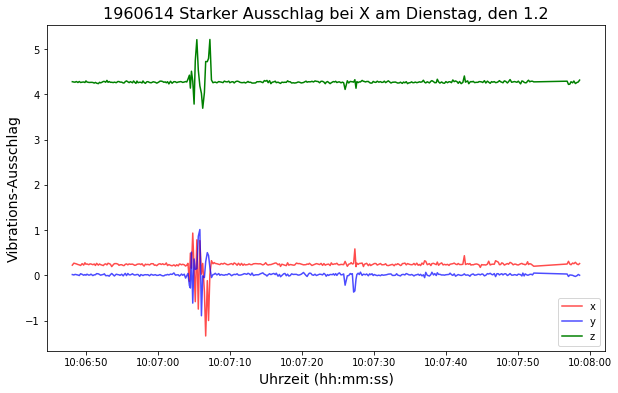

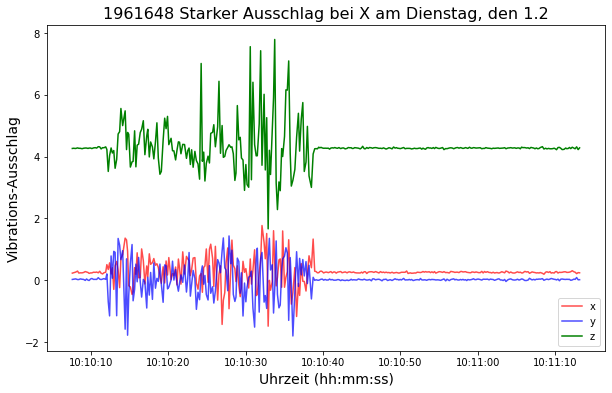

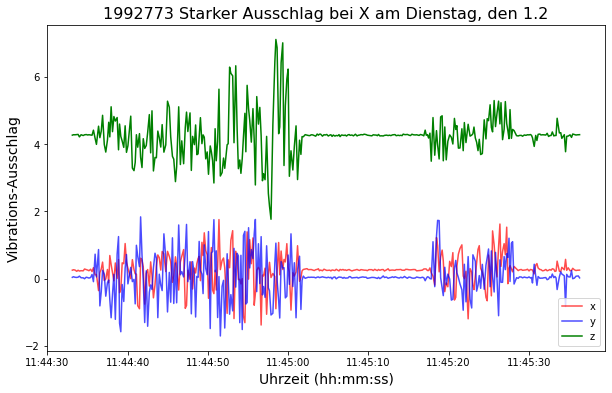

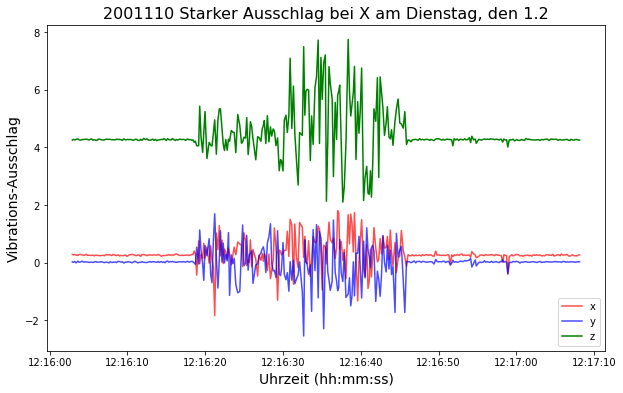

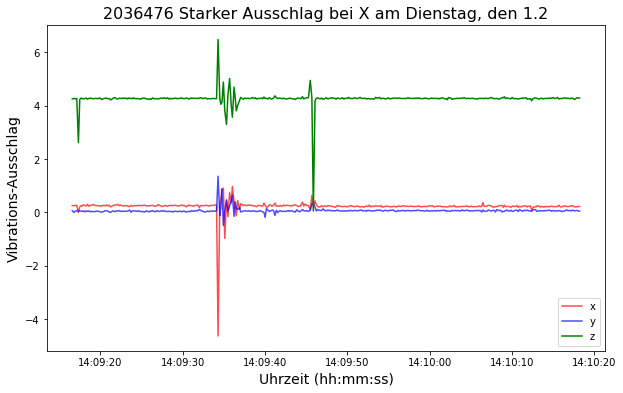

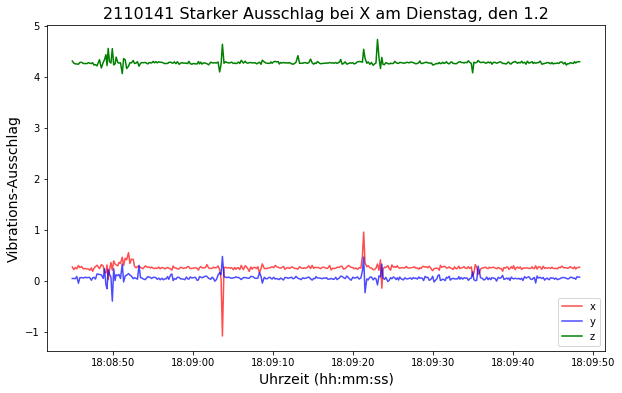

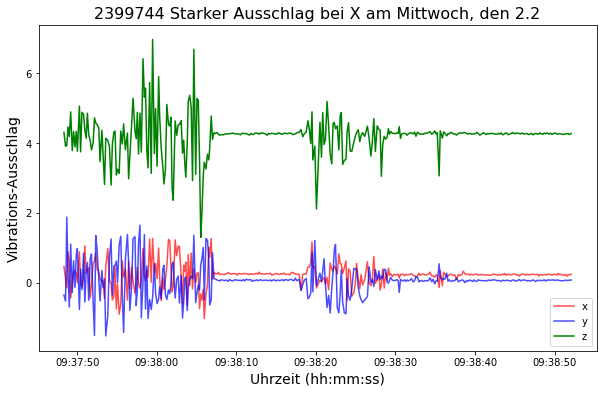

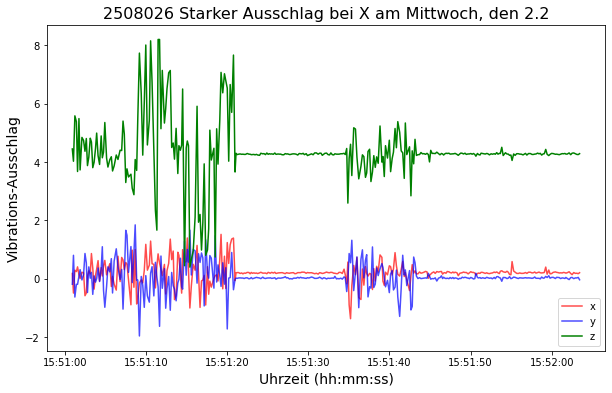

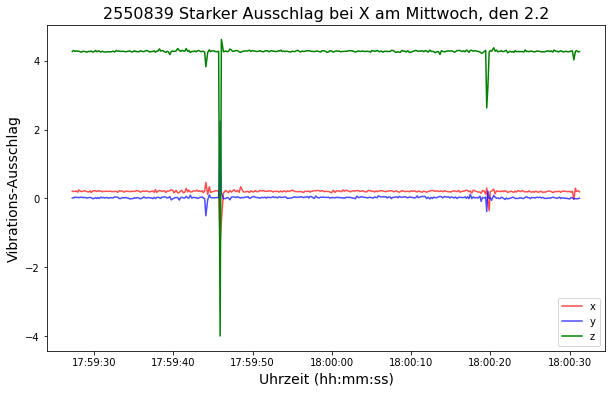

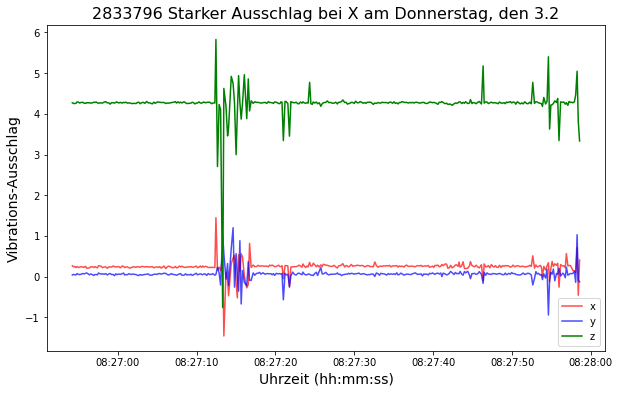

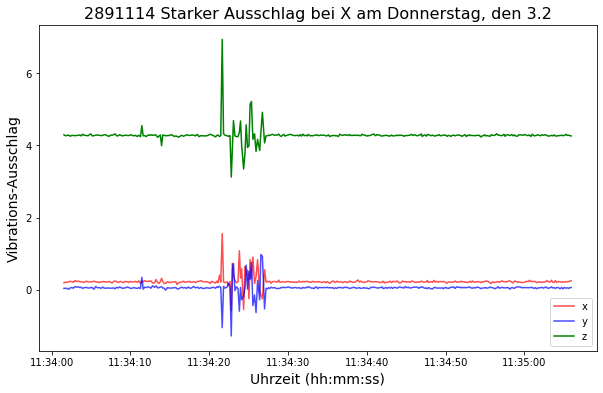

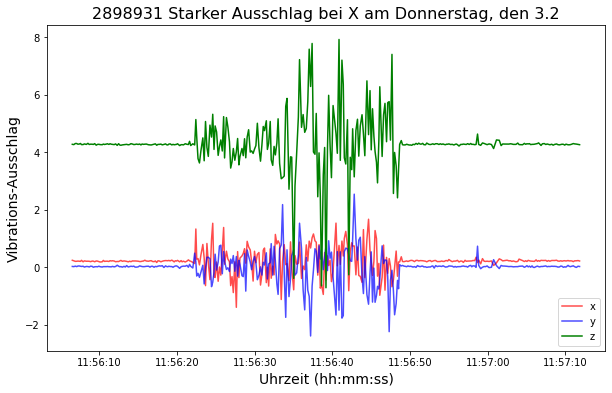

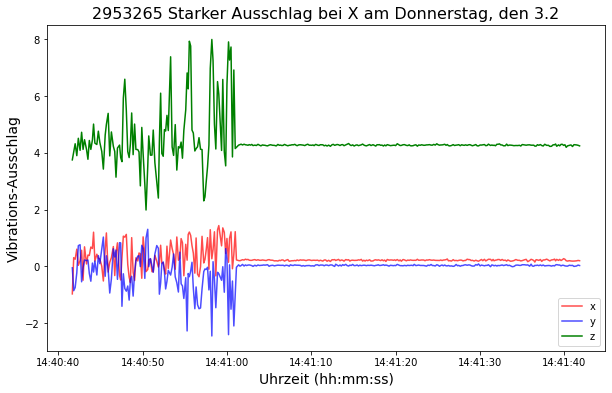

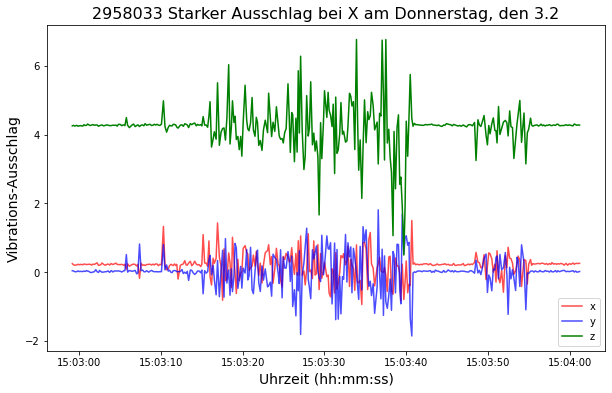

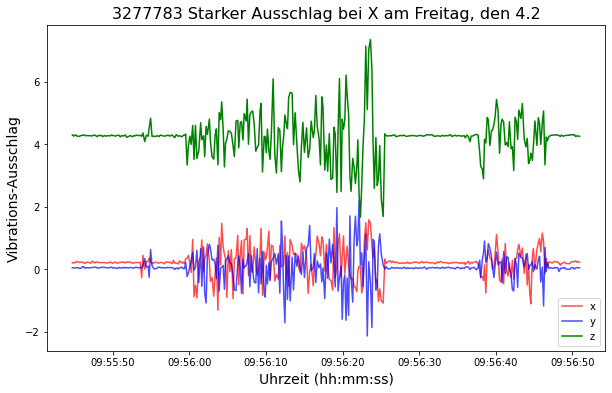

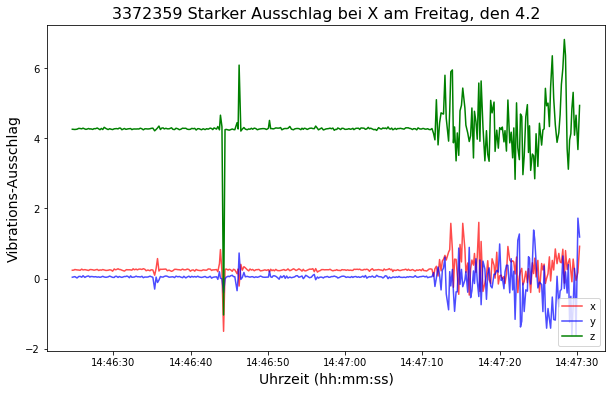

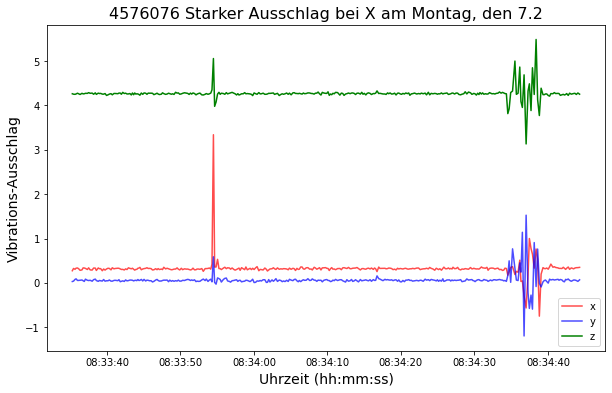

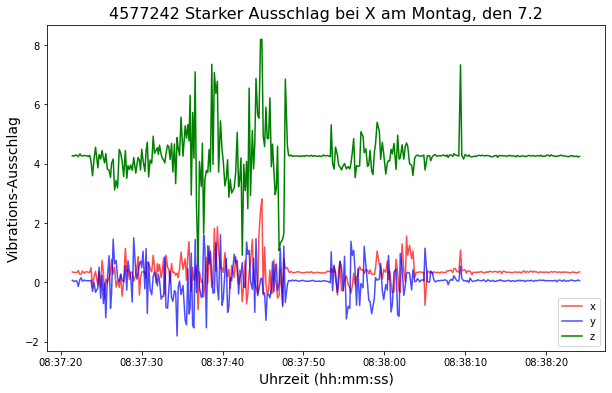

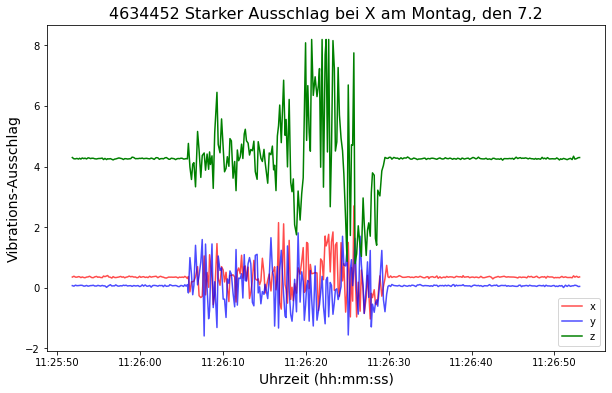

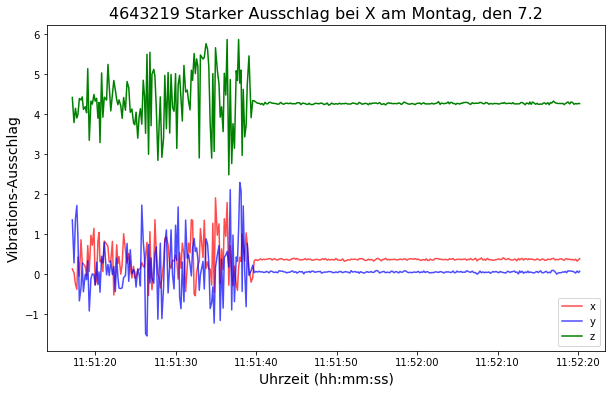

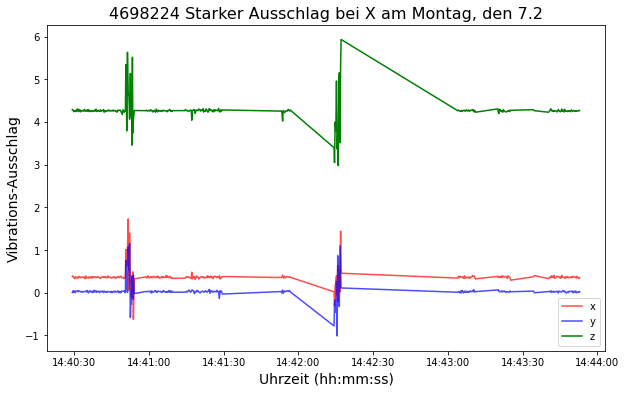

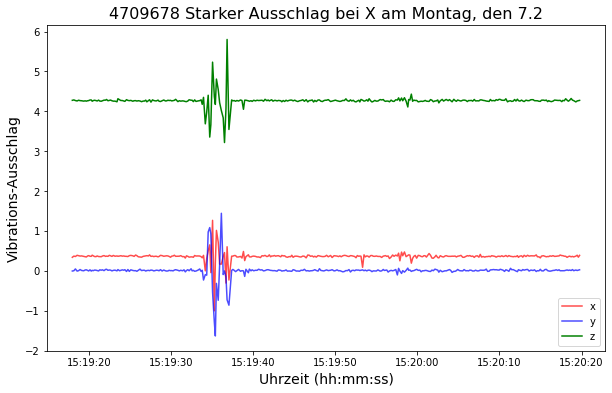

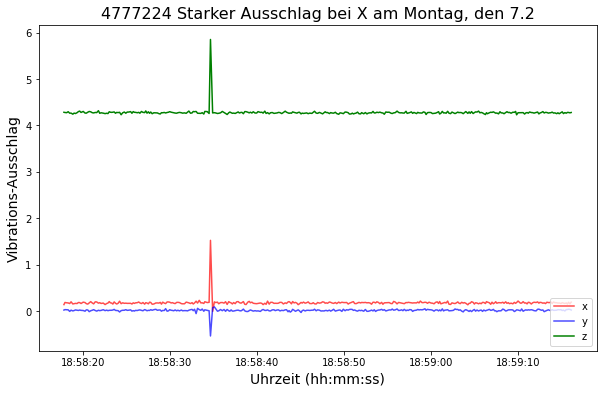

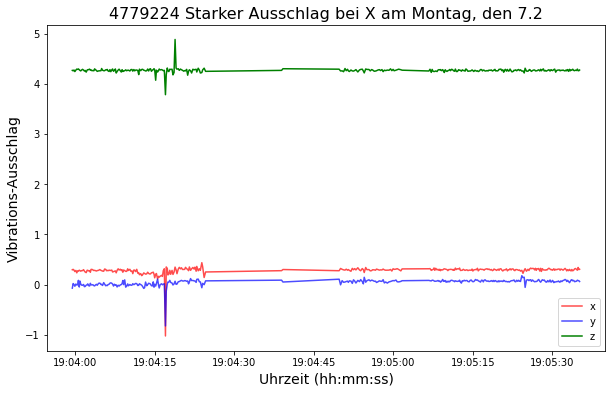

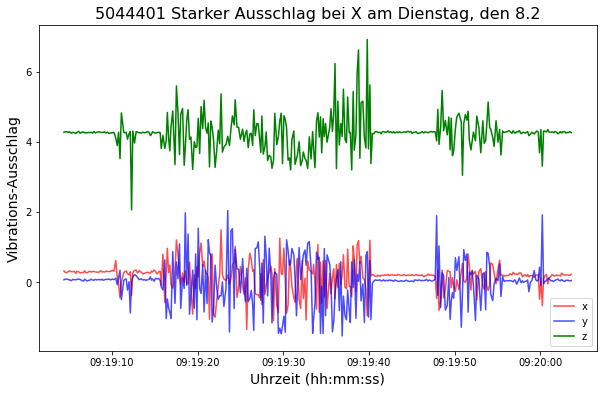

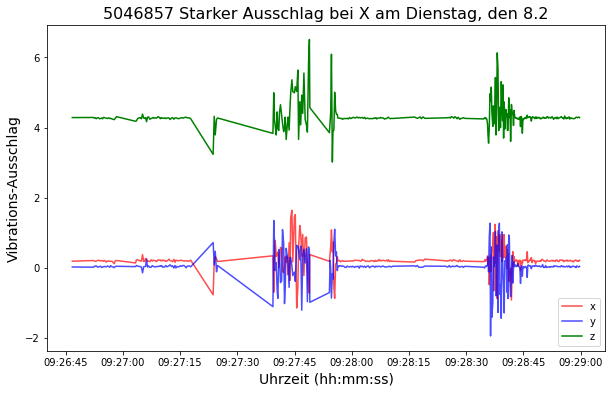

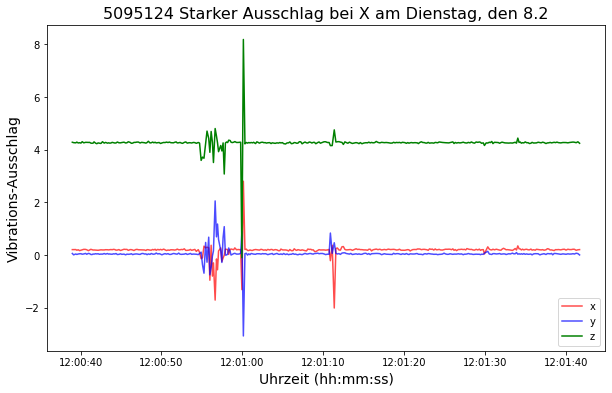

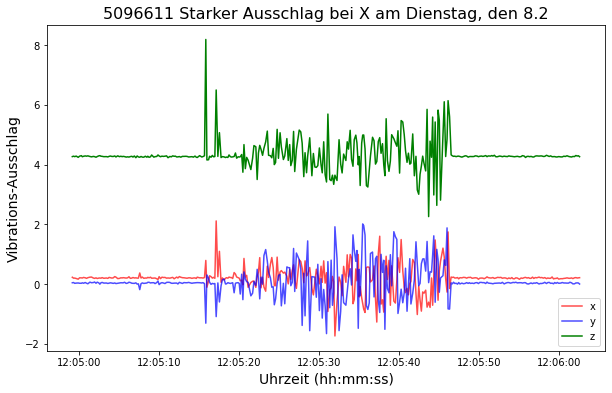

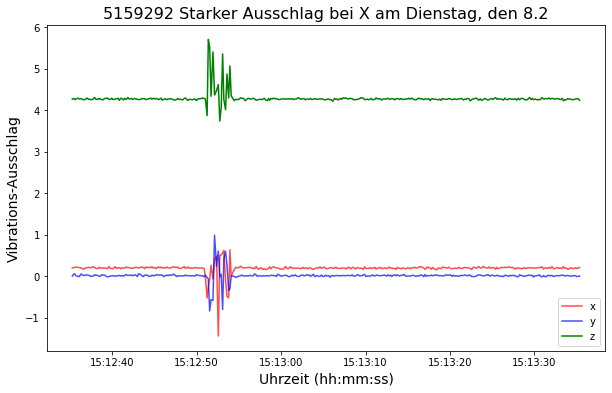

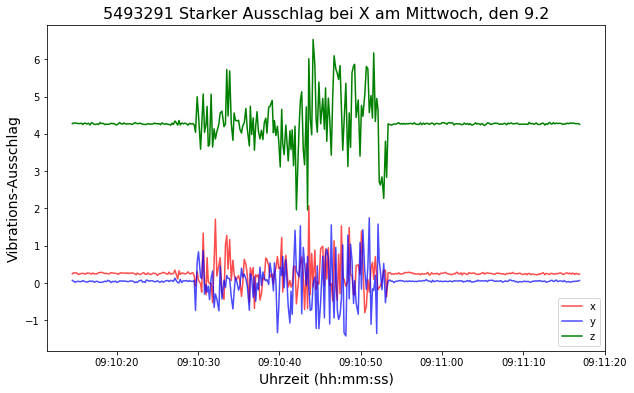

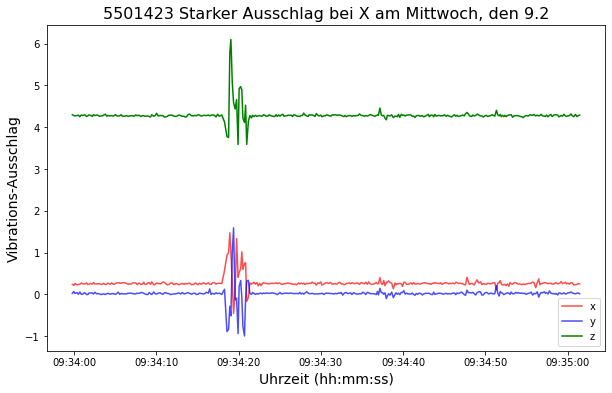

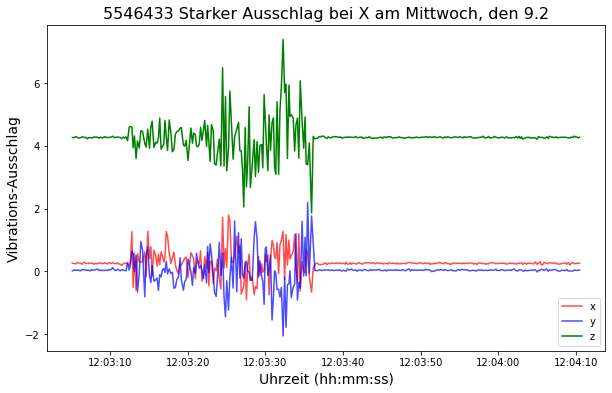

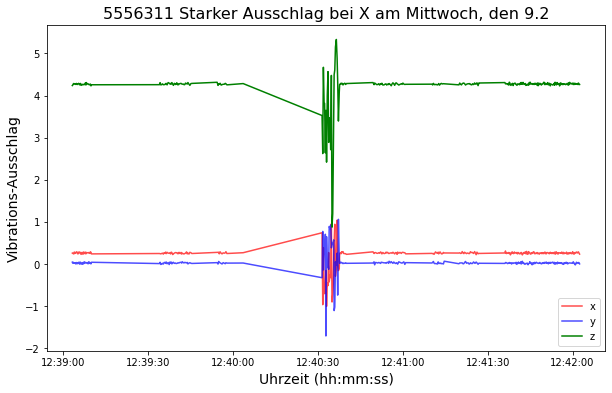

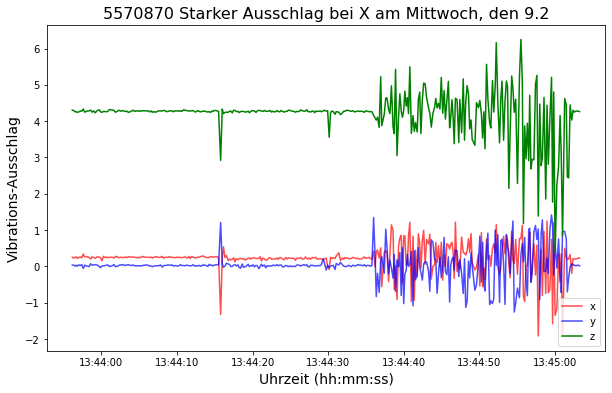

In [44]:
for i in X:
    
    if (i < 300):
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(df.time[i: i + 350], df.x[i: i + 350], color='red', label='x', alpha=0.7)
        ax.plot(df.time[i: i + 350], df.y[i: i + 350], color='blue', label='y', alpha=0.7)
        ax.plot(df.time[i: i + 350], df.z[i: i + 350], color='green', label='z')
        

    else:    
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(df.time[i - 100: i + 250], df.x[i - 100: i + 250], color='red', label='x', alpha=0.7)
        ax.plot(df.time[i - 100: i + 250], df.y[i - 100: i + 250], color='blue', label='y', alpha=0.7)
        ax.plot(df.time[i - 100: i + 250], df.z[i - 100: i + 250], color='green', label='z')
        

    plt.legend(loc=4)
    ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
    ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)    
    ax.set_title(str(i) + " Starker Ausschlag bei X am " + str(df.day_name[i]) + ", den " + str(df.time.dt.day[i]) + "." + str(df.time.dt.month[i]), fontsize=16)    

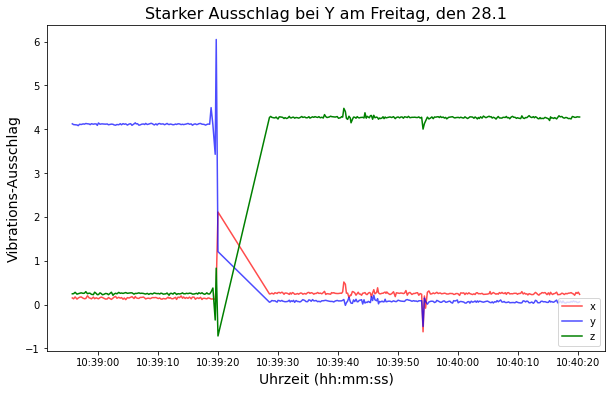

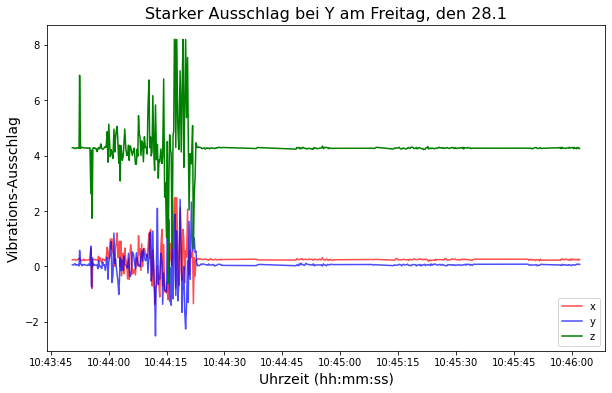

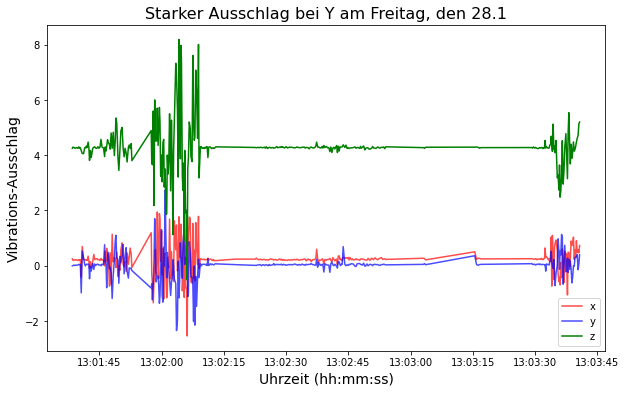

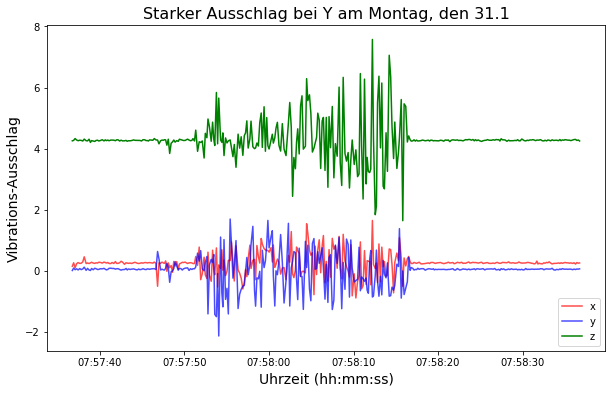

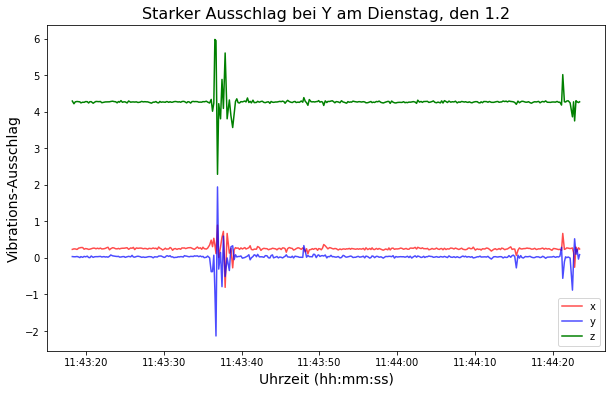

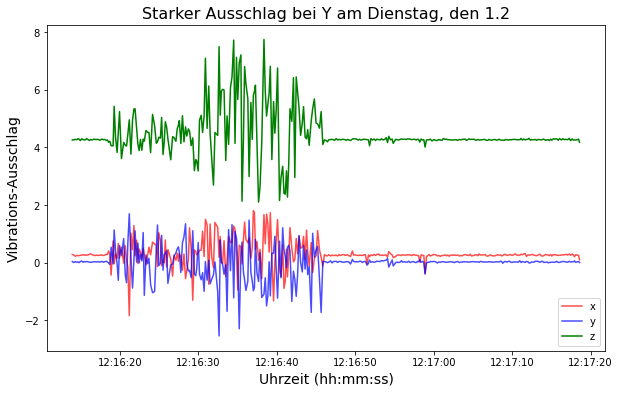

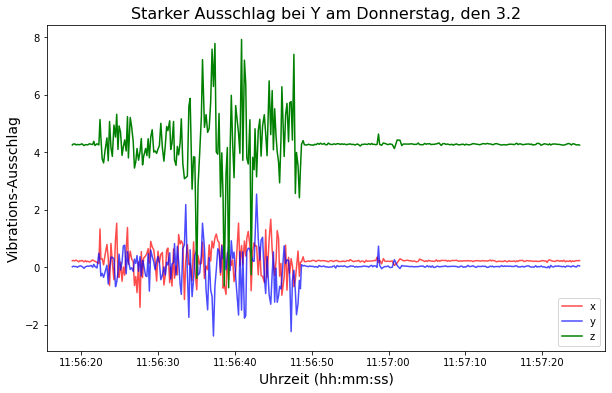

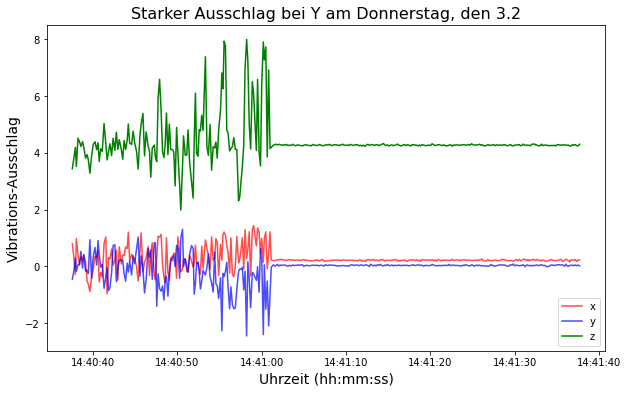

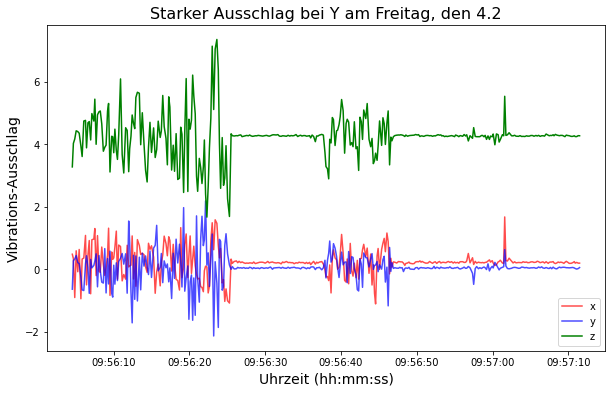

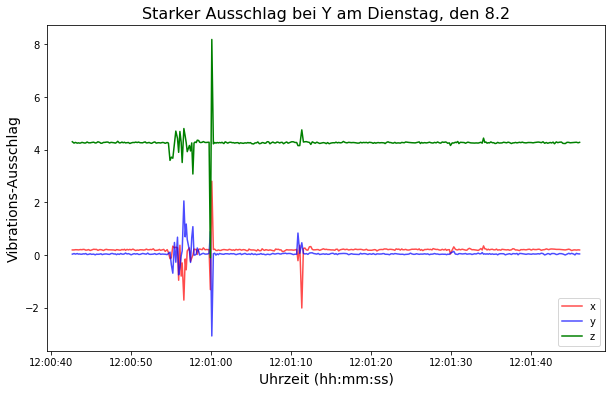

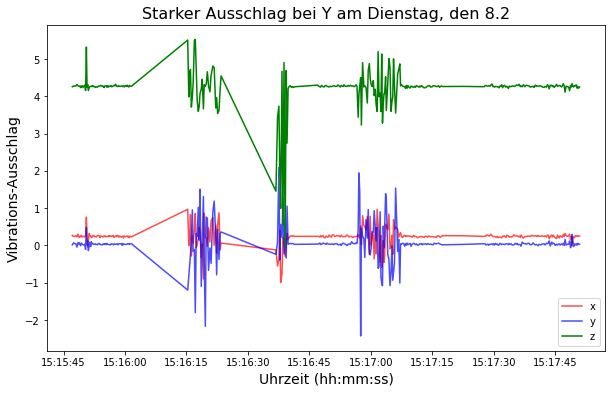

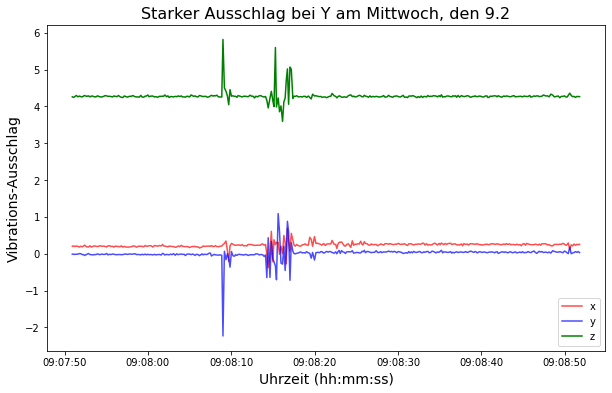

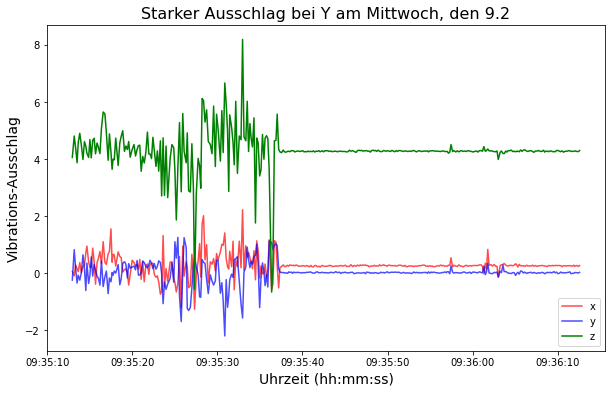

In [37]:
for i in Y:
    if (i < 300):
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(df.time[i: i + 350], df.x[i: i + 350], color='red', label='x', alpha=0.7)
        ax.plot(df.time[i: i + 350], df.y[i: i + 350], color='blue', label='y', alpha=0.7)
        ax.plot(df.time[i: i + 350], df.z[i: i + 350], color='green', label='z')

    else:    
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(df.time[i - 100: i + 250], df.x[i - 100: i + 250], color='red', label='x', alpha=0.7)
        ax.plot(df.time[i - 100: i + 250], df.y[i - 100: i + 250], color='blue', label='y', alpha=0.7)
        ax.plot(df.time[i - 100: i + 250], df.z[i - 100: i + 250], color='green', label='z')

    plt.legend(loc=4)
    ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
    ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)    
    ax.set_title("Starker Ausschlag bei Y am " + str(df.day_name[i]) + ", den " + str(df.time.dt.day[i]) + "." + str(df.time.dt.month[i]), fontsize=16)  

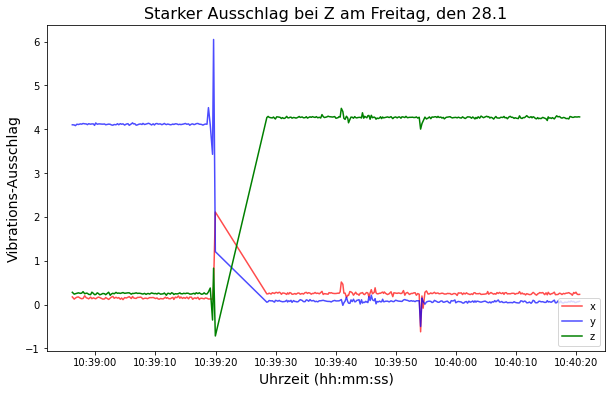

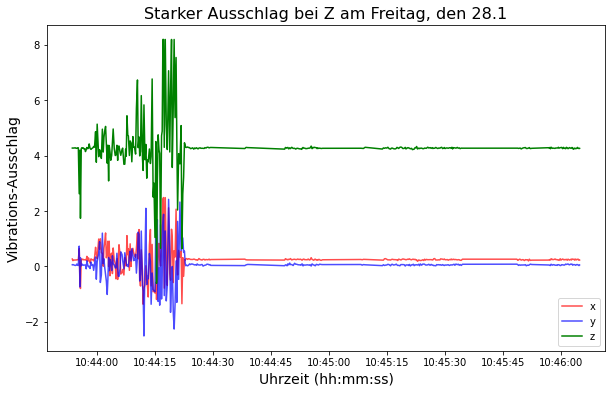

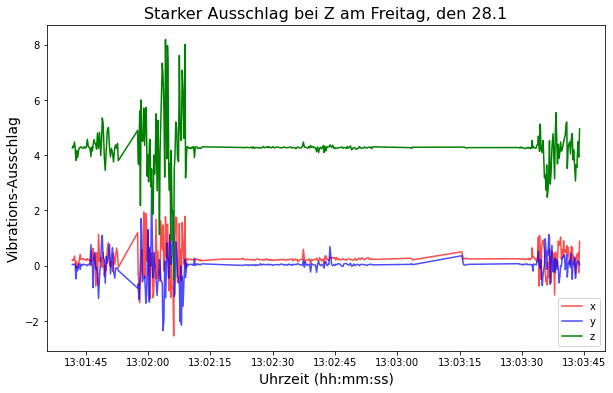

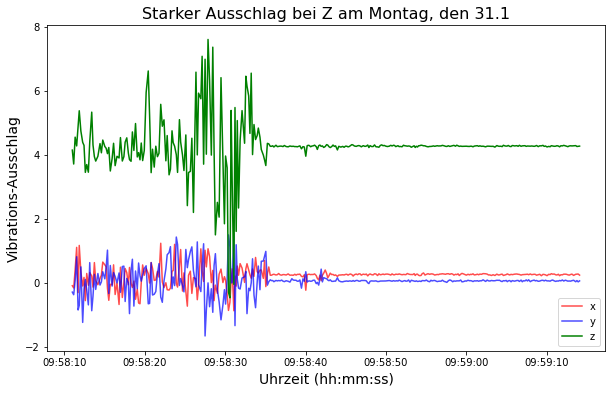

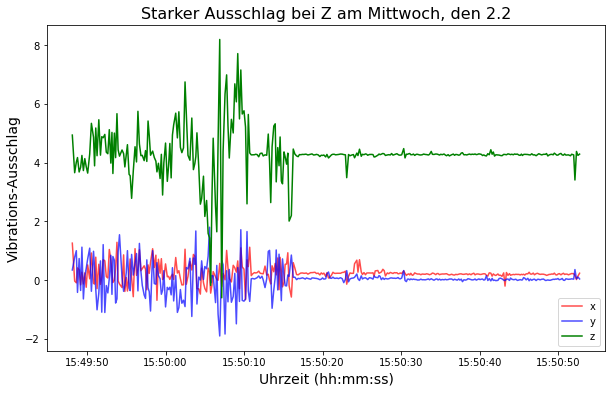

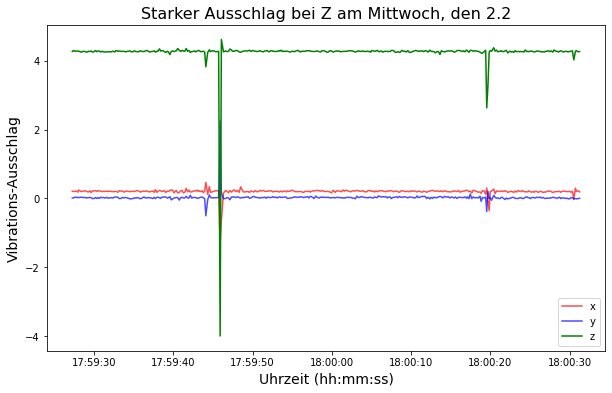

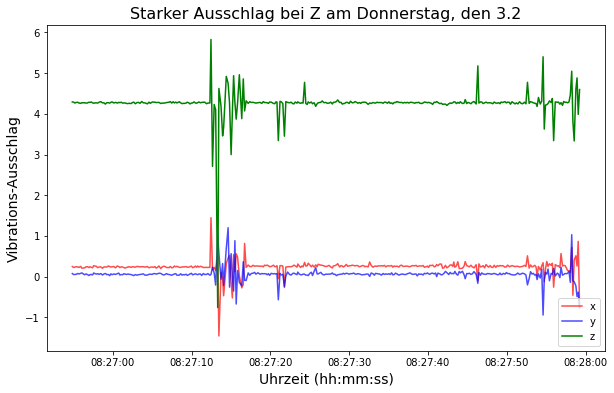

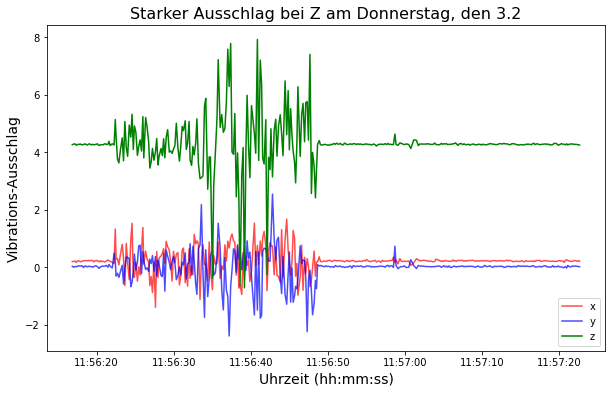

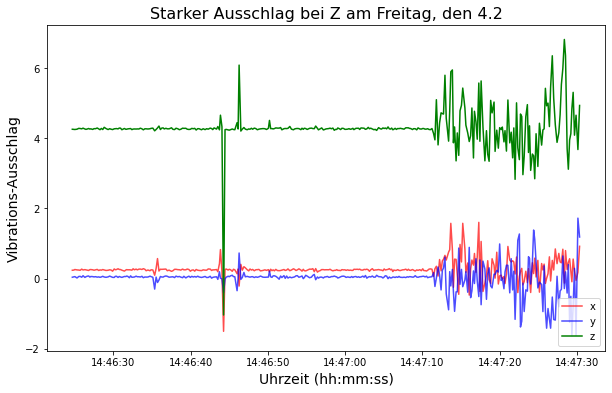

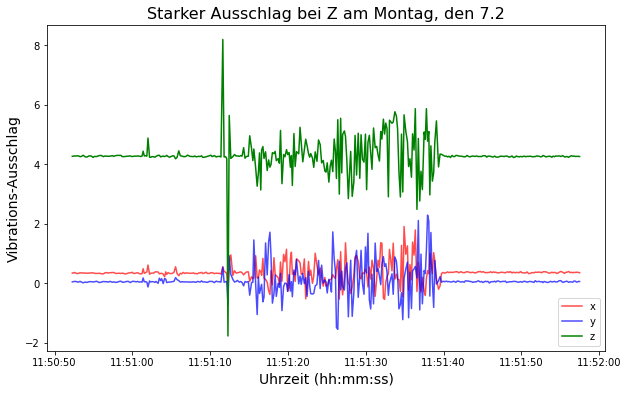

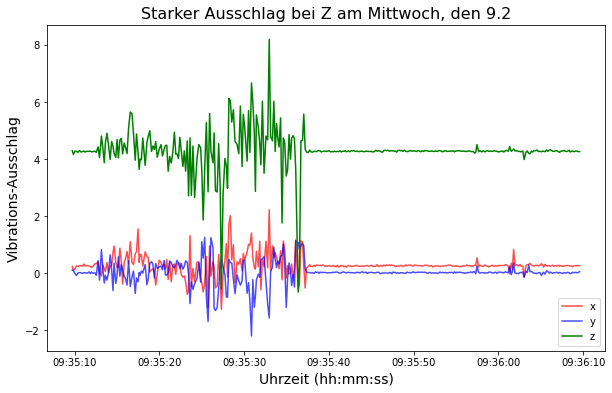

In [38]:
for i in Z:
    if (i < 300):
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(df.time[i: i + 350], df.x[i: i + 350], color='red', label='x', alpha=0.7)
        ax.plot(df.time[i: i + 350], df.y[i: i + 350], color='blue', label='y', alpha=0.7)
        ax.plot(df.time[i: i + 350], df.z[i: i + 350], color='green', label='z')

    else:    
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(df.time[i - 100: i + 250], df.x[i - 100: i + 250], color='red', label='x', alpha=0.7)
        ax.plot(df.time[i - 100: i + 250], df.y[i - 100: i + 250], color='blue', label='y', alpha=0.7)
        ax.plot(df.time[i - 100: i + 250], df.z[i - 100: i + 250], color='green', label='z')

    plt.legend(loc=4)
    ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
    ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)    
    ax.set_title("Starker Ausschlag bei Z am " + str(df.day_name[i]) + ", den " + str(df.time.dt.day[i]) + "." + str(df.time.dt.month[i]), fontsize=16)  

In [39]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [40]:
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[:] = scaler.fit_transform(df_norm)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[object_]'>)

In [ ]:
dbscan = DBSCAN(eps=0.14, min_samples=5)
labels = dbscan.fit_predict(df_norm)
#df_pca['label_DBSCAN'] = labels

MemoryError: 

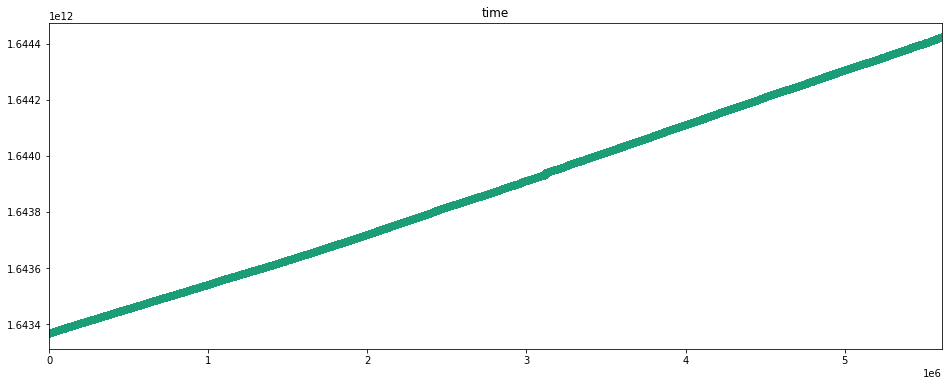

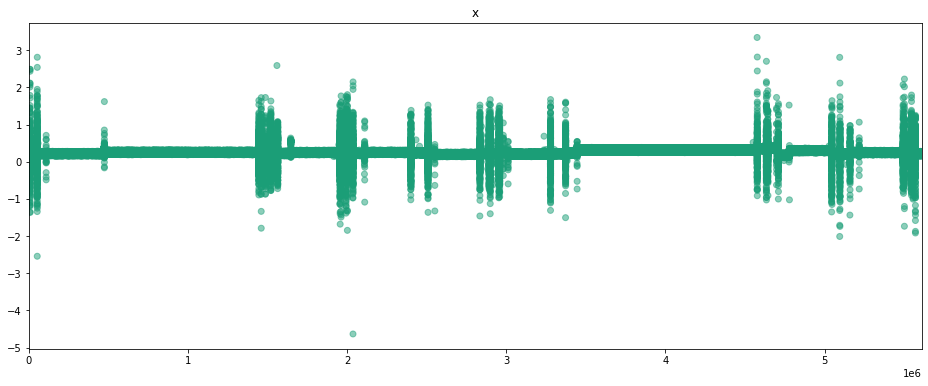

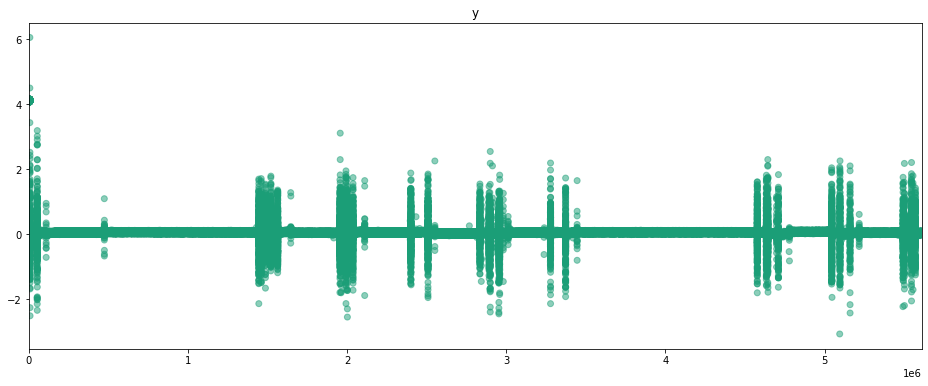

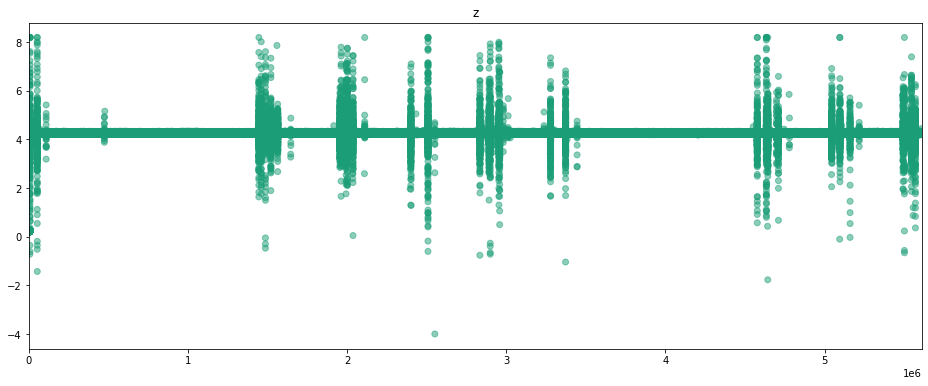

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.scatter(df.index, df['x'], c=labels, alpha=0.5, cmap=plt.get_cmap('Dark2'))
plt.xlim([df.index[0], df.index[-1]])
plt.title('X')